# Proyecto Final UD2
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

En este proyecto, los alumnos del módulo de Machine Learning deberán demostrar los conocimientos adquiridos durante la UD2 y aplicar al menos dos algoritmos diferentes de aprendizaje supervisado vistos en clase (KNN, Regresión Lineal, Regresión Logística, Árboles de Decisión, SVM).

Para ello, tomaremos como referencia el dataset credit_train.csv y credit_test.csv que contienen la información sobre una campaña de márketing llevada a cabo mediante llamadas teléfonicas para captar clientes que quieran acceder a un crédito.

**Features o Input variables:**

1 - age: edad numérica
2 - job : tipo de trabajo (puede tomar los valores: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : estado civil (puede tomar los valores: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education : nivel de estudios (puede tomar los valores: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: ya tiene un crédito solicitado por defecto? (puede tomar los valores: 'no','yes','unknown')
6 - housing: tiene hipoteca? (puede tomar los valores: 'no','yes','unknown')
7 - loan: tiene una cuenta personal? (puede tomar los valores: 'no','yes','unknown')
8 - contact: tipo de comunicación de contacto (puede tomar los valores: 'cellular','telephone')
9 - month: último mes de contacto (puede tomar los valores: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: último día de la semana en el que se le ha contactado (puede tomar los valores: 'mon','tue','wed','thu','fri')
11 - duration: duración del último contacto en segundos (numérico). Importante: este atributo afecta en gran medida a la salida ya que si duration es 0, entonces  la salida es 'no')
12 - campaign: número de veces que se le ha contactado durante la campaña a este cliente (numérico, incluye el último contacto)
13 - pdays: número de días que han pasado desde que el cliente fue contactado por última vez(numérico; 999 significa que no ha sido contactado anteriormente)
14 - previous: número de contactos anteriores a esta campaña a este cliente(numérico)
15 - poutcome: resultado de la última campaña de marketing (categorical: 'failure','nonexistent','success')
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: IPC - indicador mensual (numérico)
18 - cons.conf.idx: índice de confianza de los consumidores - indicador mensual (numérico)
19 - euribor3m: euribor tasa 3 meses - indicador diario (numérico)
20 - nr.employed: número de trabajadores - indicador en porciones  (numérico)

**Output variable (desired target):**
21 - y - Suscripción al crédito por parte del cliente? (binary: 'yes','no')

Los requisitos mínimos de este proyecto consisten en:

* Etapas comunes 1, 2 y 3 de importación, análisis numérico y visual, así como preprocesado.
* Para cada algoritmo que apliques deberás de mantener la siguiente estructura de 5 etapas (del 4-8), pero puedes añadir subapartados o etapas adicionales.
* En cada etapa se deben añadir explicaciones justificativas de lo que se quiere hacer, así como de los resultados obtenidos.
* Como resultado final, se deben contrastar los resultados obtenidos y comparar los algoritmos utilizados indicando claramente cual y porqué obtiene mejor resultados.

Cualificaciones:
- Uso de 2 algoritmos: cualificación máxima de 7 puntos
- Uso de 3 algoritmos: cualificación máxima de 9 puntos.
- Almacenaje de los datasets en AWS S3 y uso de 3 algoritmos: cualificación máxima de 10 puntos.

Uso de GIT para 



## 1. Importación de paquetes y dataset

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


In [2]:
dftest = pd.read_csv("data/credit-test.csv")
dftrain = pd.read_csv("data/credit-train.csv")

## 2.EDA y Visual EDA

In [3]:
dftrain.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [10]:
dftest.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [11]:
dftest.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## 3. Preprocessing data


Check for missing values

In [24]:
corr_df = dftrain.corr()
print("The correlation DataFrame is:")
print(corr_df, "\n")

The correlation DataFrame is:
                     age       job   marital  education   default   housing  \
age             1.000000  0.001250 -0.389753  -0.117892  0.164965 -0.001603   
job             0.001250  1.000000  0.027897   0.134121 -0.028277  0.006962   
marital        -0.389753  0.027897  1.000000   0.109220 -0.079450  0.010467   
education      -0.117892  0.134121  0.109220   1.000000 -0.186859  0.016825   
default         0.164965 -0.028277 -0.079450  -0.186859  1.000000 -0.015815   
housing        -0.001603  0.006962  0.010467   0.016825 -0.015815  1.000000   
loan           -0.007368 -0.010209  0.005788   0.006384 -0.003782  0.044296   
duration       -0.000866 -0.006490  0.010290  -0.015102 -0.011794 -0.007658   
campaign        0.004670 -0.006848 -0.007251   0.000196  0.032753 -0.011080   
pdays          -0.034369 -0.028468 -0.037942  -0.046626  0.080062 -0.010551   
previous        0.024365  0.020965  0.038689   0.038831 -0.102416  0.021314   
poutcome        0.0197

In [13]:
for c in dftrain.columns:
    miss = dftrain[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has NO missing value!".format(c))

age has NO missing value!
job has NO missing value!
marital has NO missing value!
education has NO missing value!
default has NO missing value!
housing has NO missing value!
loan has NO missing value!
contact has NO missing value!
month has NO missing value!
day_of_week has NO missing value!
duration has NO missing value!
campaign has NO missing value!
pdays has NO missing value!
previous has NO missing value!
poutcome has NO missing value!
emp_var_rate has NO missing value!
cons_price_idx has NO missing value!
cons_conf_idx has NO missing value!
euribor3m has NO missing value!
nr_employed has NO missing value!
y has NO missing value!


In [14]:
for c in dftest.columns:
    miss = dftest[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has NO missing value!".format(c))

age has NO missing value!
job has NO missing value!
marital has NO missing value!
education has NO missing value!
default has NO missing value!
housing has NO missing value!
loan has NO missing value!
contact has NO missing value!
month has NO missing value!
day_of_week has NO missing value!
duration has NO missing value!
campaign has NO missing value!
pdays has NO missing value!
previous has NO missing value!
poutcome has NO missing value!
emp_var_rate has NO missing value!
cons_price_idx has NO missing value!
cons_conf_idx has NO missing value!
euribor3m has NO missing value!
nr_employed has NO missing value!


In [27]:
#label encoder-----------------------------------------------------(no generar mas columnas)'job','marital','education','default','housing','loan','campaign','previous','poutcome'
label_encoder = preprocessing.LabelEncoder()
#train dataset
cols = ['job','marital','education','default','housing','loan','campaign','previous','poutcome']
dftrain[cols] = dftrain[cols].apply(LabelEncoder().fit_transform)

#test dataset
dftest[cols] = dftest[cols].apply(LabelEncoder().fit_transform)
dftest

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,30,1,1,2,0,2,0,cellular,may,fri,487,1,999,0,1,-1.8,92.893,-46.2,1.313,5099.1
1,39,7,2,3,0,0,0,telephone,may,fri,346,3,999,0,1,1.1,93.994,-36.4,4.855,5191.0
2,25,7,1,3,0,2,0,telephone,jun,wed,227,0,999,0,1,1.4,94.465,-41.8,4.962,5228.1
3,38,7,1,2,0,1,1,telephone,jun,fri,17,2,999,0,1,1.4,94.465,-41.8,4.959,5228.1
4,47,0,1,6,0,2,0,cellular,nov,mon,58,0,999,0,1,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,cellular,jul,thu,53,0,999,0,1,1.4,93.918,-42.7,4.958,5228.1
4115,39,0,1,3,0,2,0,telephone,jul,fri,219,0,999,0,1,1.4,93.918,-42.7,4.959,5228.1
4116,27,8,2,3,0,0,0,cellular,may,mon,64,1,999,1,0,-1.8,92.893,-46.2,1.354,5099.1
4117,58,0,1,3,0,0,0,cellular,aug,fri,528,0,999,0,1,1.4,93.444,-36.1,4.966,5228.1


In [26]:
colstodrop = ["contact","month","day_of_week"]
dftrain.drop(colstodrop)
dftest.drop(colstodrop)

KeyError: "['contact', 'month', 'day_of_week'] not found in axis"

<AxesSubplot:>

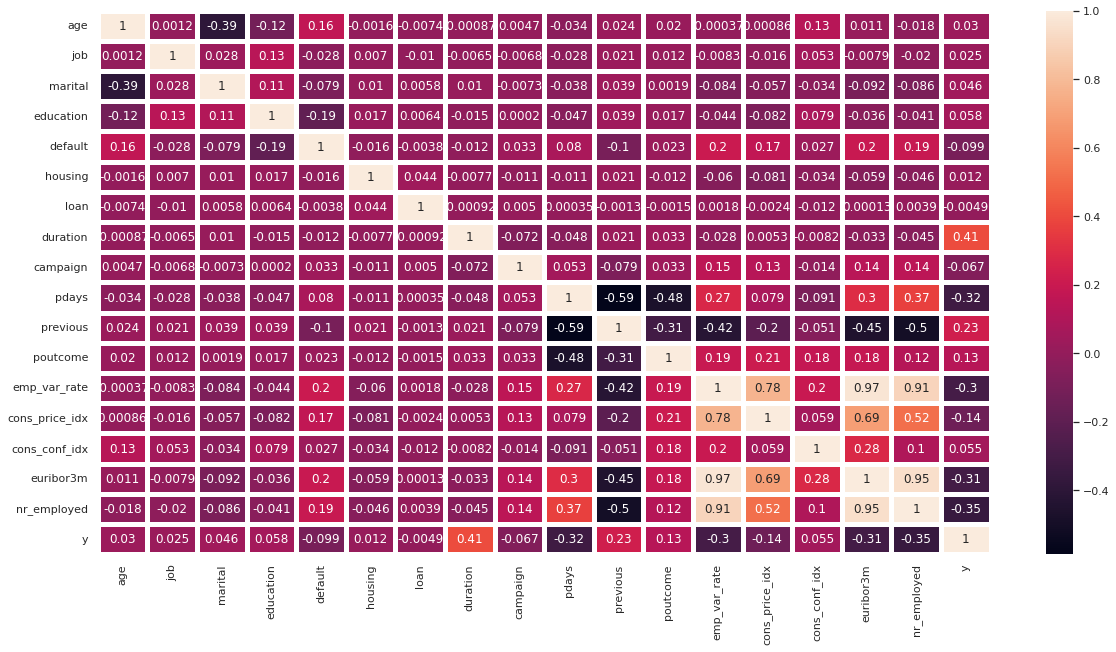

In [23]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(dftrain.corr(),annot=True,linewidths=5)

## 4. Creación del modelo y división del dataset

## 5. Entrenamiento

## 6. Análisis de resultados

## 7. Realización de predicciones

## 8. Visualización